# Кластеризация данных

1. Используя Kmeans
2. Используя DEC (Deep Embedded Clustering) архитектуру

# Скачивание датасета и импорт библиотек

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv

--2025-01-01 23:06:57--  https://storage.yandexcloud.net/academy.ai/Mall_Customers.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/csv]
Saving to: ‘Mall_Customers.csv.5’

Mall_Customers.csv. 100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-01-01 23:06:58 (906 MB/s) - ‘Mall_Customers.csv.5’ saved [3981/3981]



In [ ]:
import pandas as pd
from torch import nn
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Подготовка датасета

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
# @title Все ID разные удаляем ID
df = df.drop(columns = ['CustomerID', 'Gender', 'Age'])
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
# @title Заменяем колонки на удобные
df = df.rename(
    columns={
        "Annual Income (k$)": "AnnualIncome",
        "Spending Score (1-100)": "SpendingScore"
    })
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
# @title Нормализация
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df)

# K-mean

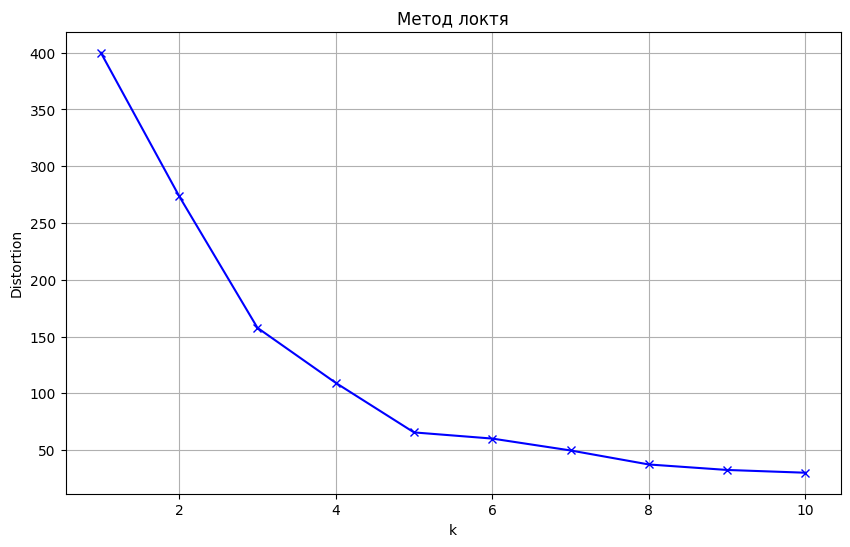

[399.99999999999994,
 273.66888662642003,
 157.70400815035939,
 109.22822707921345,
 65.56840815571681,
 60.132874871934206,
 49.668244837367965,
 37.31912287833882,
 32.495081199100916,
 30.05932269404222]

In [ ]:
# @title Метод локтя
def elbow_method(X, max_k):
    distortions = []  # Список для хранения значений искажений
    K = range(1, max_k+1)  # Диапазон возможных значений k

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)  # Создаем объект KMeans с k кластерами
        kmeans.fit(X)  # Обучаем модель на данных
        distortions.append(kmeans.inertia_)  # Добавляем значение искажения (inertia) в список

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.plot(K, distortions, 'bx-')  # Построение графика
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Метод локтя')
    plt.grid(True)
    plt.show()

    return distortions

# Применение метода
elbow_method(X, 10)

По графику метода локтя мы видим, что "локоть" находится при K = 7. Это указывает на то, что оптимальное количество кластеров равно 7.

In [ ]:
# @title Проверка количества кластеров
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt


# Запуск DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Количество кластеров
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f'Количество кластеров: {n_clusters}')

Количество кластеров: 7


In [ ]:
# @title Оптимальное количество кластеров 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)
total_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Добавление меток кластеров в исходный DataFrame
df['K-means'] = total_labels

# Вывод первых 5 строк данных с метками кластеров
df.head()

,AnnualIncome,SpendingScore,K-means
0,15,39,5
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,5


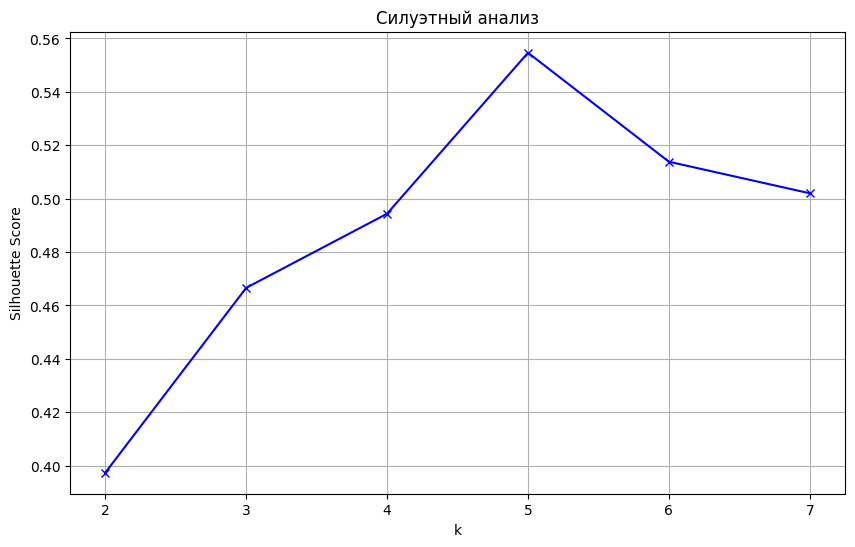

[0.3973270007887498,
 0.46658474419000145,
 0.49434988482196784,
 0.5546571631111091,
 0.5138257534676561,
 0.50200146805547]

In [ ]:
# @title Силуэтный анализ
from sklearn.metrics import silhouette_score
def silhouette_analysis(X, max_k):
    silhouette_scores = []  # Список для хранения значений силуэтных коэффициентов
    K = range(2, max_k+1)  # Диапазон возможных значений k, начиная с 2

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)  # Создаем объект KMeans с k кластерами
        labels = kmeans.fit_predict(X)  # Обучаем модель и получаем метки кластеров
        score = silhouette_score(X, labels)  # Вычисляем силуэтный коэффициент
        silhouette_scores.append(score)  # Добавляем значение в список

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bx-')  # Построение графика
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('Силуэтный анализ')
    plt.grid(True)
    plt.show()

    return silhouette_scores

# Применение метода
silhouette_analysis(X, n_clusters)

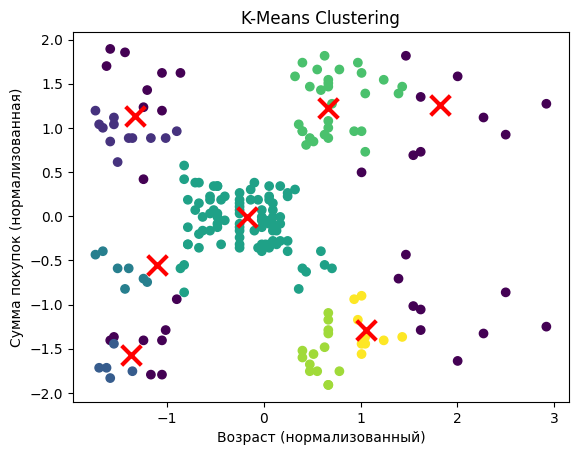

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Возраст (нормализованный)')
plt.ylabel('Сумма покупок (нормализованная)')
plt.title('K-Means Clustering')
plt.show()

## Метрики

In [ ]:
# Евклидово расстояние
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Манхэттенское расстояние
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

# Косинусное сходство
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

In [ ]:
# @title Подготовка для метрик
df_labels = pd.DataFrame(data=total_labels,
                         columns=['K-means'])
df_labels = pd.DataFrame(data=df_labels['K-means'].unique(),
                         columns=['K-means'])

# Нормализованные данные по кластерам
df_normalize = pd.DataFrame(data=X,
                            columns=['AnnualIncome', 'SpendingScore'])
df_normalize['K-means'] = total_labels

In [ ]:
# @title Расчет Метрик
euclidean_label = []
manhattan_label = []
cosine_label = []
for cluster in df_labels['K-means']:
    temp_df = df_normalize[df_normalize['K-means'] == cluster]
    coordinates = np.array(temp_df[['AnnualIncome', 'SpendingScore']])
    euclidean_len = 0
    manhattan_len = 0
    cosine_len = 0

    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            euclidean_len += euclidean_distance(coordinates[i], coordinates[j]) # Высчитываем сумму евклидово расстояния
            manhattan_len += manhattan_distance(coordinates[i], coordinates[j]) # Вычисляем Манхэттенское расстояние
            cosine_len = cosine_similarity(coordinates[i], coordinates[j])

    euclidean_label.append(euclidean_len)
    manhattan_label.append(manhattan_len)
    cosine_label.append(cosine_len)

df_labels['Euclidean_distance'] = euclidean_label
df_labels['Manhattan_distance'] = manhattan_label
df_labels['Cosine_similarity'] = cosine_label
df_labels

,K-means,Euclidean_distance,Manhattan_distance,Cosine_similarity
0,5,57.467778,72.392478,0.994573
1,2,146.878025,185.788270,0.890011
2,4,28.074007,35.147059,0.999714
3,0,1513.214474,1945.339007,0.931502
4,6,207.931099,260.740165,0.950364
5,3,529.959806,660.873642,0.997370
6,1,44.994803,56.426609,0.998364


# DEC

In [ ]:
import torch
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling

In [ ]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Полностью подключенная симметричная модель автоэнкодера.

    dims: список размеров слоев кодировщика типа [500, 500, 2000, 10].
          dims[0] — входной размер, dims[-1] — размер скрытого скрытого слоя.

    действие: функция активации

    Возвращает:
        (autoencoder_model, encoder_model): модель автоэнкодера и модель кодировщика.
    """
    n_stacks = len(dims) - 1

    input_data = Input(shape=(dims[0],), name='input')
    x = input_data

    # Внутренние слои кодера
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # Латентный скрытый слой
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)

    x = encoded
    # Внутренние слои декодера
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # Выход декодера
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)

    decoded = x

    autoencoder_model = Model(inputs=input_data, outputs=decoded, name='autoencoder')
    encoder_model     = Model(inputs=input_data, outputs=encoded, name='encoder')

    return autoencoder_model, encoder_model

In [ ]:
n_epochs   = 25
batch_size = 32

In [ ]:
dims = [X.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 7., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(learning_rate=0.1, momentum=0.8)
save_dir = 'kaggle/working'

In [ ]:
autoencoder, encoder = autoencoder(dims, init=init)

In [ ]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(X, X, batch_size=batch_size, epochs=n_epochs)

Epoch 1/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.0004
Epoch 2/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9764
Epoch 3/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0425
Epoch 4/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9550
Epoch 5/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0815
Epoch 6/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9554
Epoch 7/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0054
Epoch 8/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0808
Epoch 9/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9322
Epoch 10/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6364
Epoch 11/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.6579
Epoch 12/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.5139
Epoch 13/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2251
Epoch 14/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5903
Epoch 15/25
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.4846
Epoch 16/25
7/7 ━━━━━━━━━━━━━━━━━━

In [ ]:
kmeans = KMeans(n_clusters=7)
y_pred = kmeans.fit_predict(encoder.predict(X))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


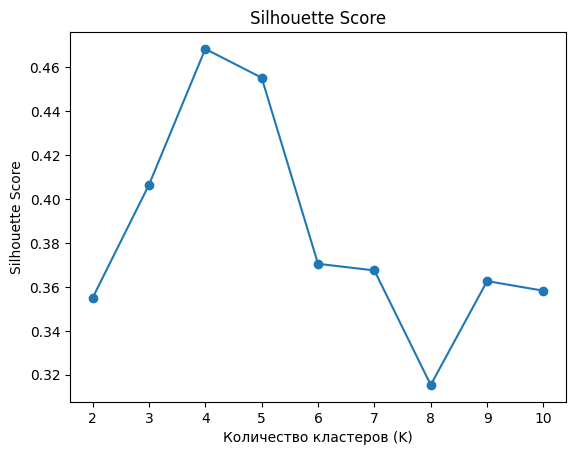

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Пример данных
data = np.random.rand(100, 2)

# Список для хранения Silhouette Scores для каждого K
silhouette_scores = []

# Пробуем разные значения K
for k in range(2, 11):  # Silhouette Score требует как минимум 2 кластера
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(encoder.predict(data))
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Построение графика
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
df['DEC'] = y_pred
df

,AnnualIncome,SpendingScore,K-means,DEC
0,15,39,5,0
1,15,81,2,1
2,16,6,4,0
3,16,77,2,1
4,17,40,5,0
...,...,...,...,...
195,120,79,1,2
196,126,28,3,6
197,126,74,1,2
198,137,18,3,6


In [ ]:
# @title Подготовка для метрик
df_labels_dec = pd.DataFrame(data=y_pred,
                         columns=['DEC'])
df_labels_dec = pd.DataFrame(data=df_labels_dec['DEC'].unique(),
                         columns=['DEC'])

# Нормализованные данные по кластерам
df_normalize = pd.DataFrame(data=X,
                            columns=['AnnualIncome', 'SpendingScore'])
df_normalize['DEC'] = y_pred

In [ ]:
# @title Расчет Метрик
euclidean_label = []
manhattan_label = []
cosine_label = []
for cluster in df_labels_dec['DEC']:
    temp_df = df_normalize[df_normalize['DEC'] == cluster]
    coordinates = np.array(temp_df[['AnnualIncome', 'SpendingScore']])
    euclidean_len = 0
    manhattan_len = 0
    cosine_len = 0

    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            euclidean_len += euclidean_distance(coordinates[i], coordinates[j]) # Высчитываем сумму евклидово расстояния
            manhattan_len += manhattan_distance(coordinates[i], coordinates[j]) # Вычисляем Манхэттенское расстояние
            cosine_len = cosine_similarity(coordinates[i], coordinates[j])

    euclidean_label.append(euclidean_len)
    manhattan_label.append(manhattan_len)
    cosine_label.append(cosine_len)

df_labels_dec['Euclidean_distance'] = euclidean_label
df_labels_dec['Manhattan_distance'] = manhattan_label
df_labels_dec['Cosine_similarity'] = cosine_label
df_labels_dec

,DEC,Euclidean_distance,Manhattan_distance,Cosine_similarity
0,0,150.583160,188.450230,0.999999
1,1,128.800726,162.064611,0.965499
2,4,450.493130,579.104429,0.985516
3,5,317.277993,406.053040,0.999733
4,2,644.770970,798.322320,0.998364
5,3,127.972796,163.506611,0.997667
6,6,36.317243,45.393728,0.997370


# Вывод метрик для удобства

In [ ]:
# @title Метрика K-means
print("Силуэтный коэффициент:", silhouette_score(X, total_labels))  # вычисляем силуэтный коэффициент

df_labels

Силуэтный коэффициент: 0.50200146805547


,K-means,Euclidean_distance,Manhattan_distance,Cosine_similarity
0,5,57.467778,72.392478,0.994573
1,2,146.878025,185.788270,0.890011
2,4,28.074007,35.147059,0.999714
3,0,1513.214474,1945.339007,0.931502
4,6,207.931099,260.740165,0.950364
5,3,529.959806,660.873642,0.997370
6,1,44.994803,56.426609,0.998364


In [ ]:
# @title Метрика DEC

print("Силуэтный коэффициент:", silhouette_score(X, y_pred))  # вычисляем силуэтный коэффициент
df_labels_dec

Силуэтный коэффициент: 0.4539993510346562


,DEC,Euclidean_distance,Manhattan_distance,Cosine_similarity
0,0,150.583160,188.450230,0.999999
1,1,128.800726,162.064611,0.965499
2,4,450.493130,579.104429,0.985516
3,5,317.277993,406.053040,0.999733
4,2,644.770970,798.322320,0.998364
5,3,127.972796,163.506611,0.997667
6,6,36.317243,45.393728,0.997370


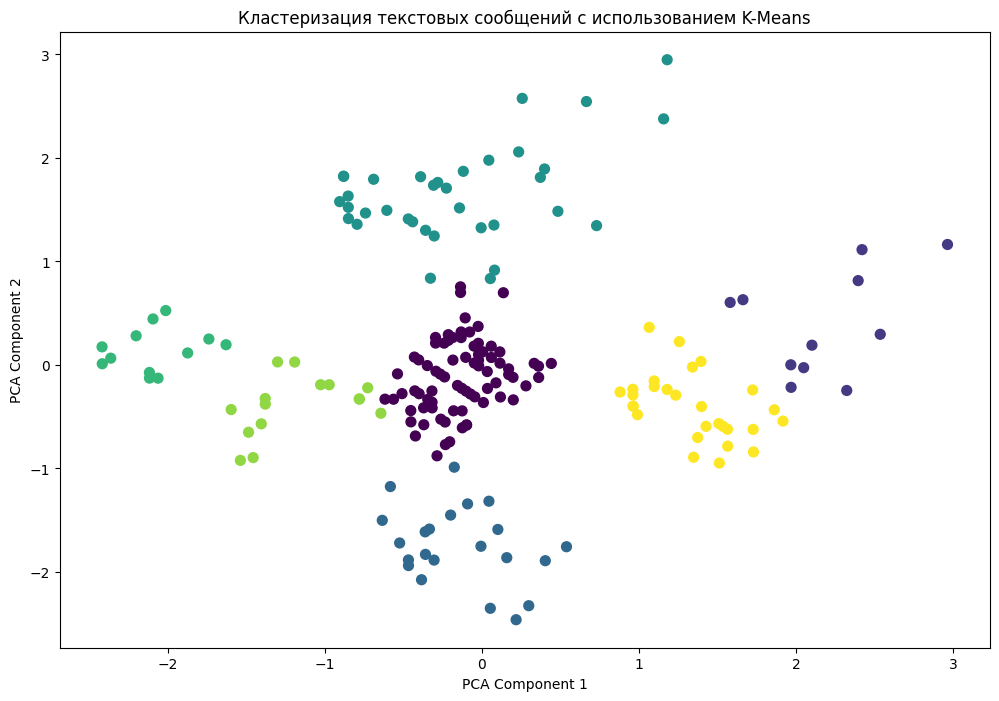

In [ ]:
from sklearn.decomposition import PCA
# Визуализация кластеров с использованием PCA для уменьшения размерности
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=total_labels, cmap='viridis', s=50)
plt.title('Кластеризация текстовых сообщений с использованием K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Вывод
Силуэтный коэффициент при DEC чуть хуже, чем при k-mean - что показывает на удовлетворительные определенные кластеры, существуют перекрывающиеся кластеры.

При этом, используя DEC метрические расстояния чуть уменьшились, что указывает на более лучшую кластеризацию